**Run all the cells below to make sure everything is working and ready to go. All cells should run without error.**

### Test Matplotlib and Plotting

In [27]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

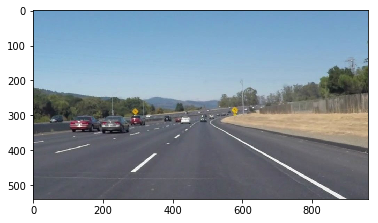

In [28]:
img = mpimg.imread('test.jpg')
plt.imshow(img)

### Test OpenCV

In [29]:
import cv2

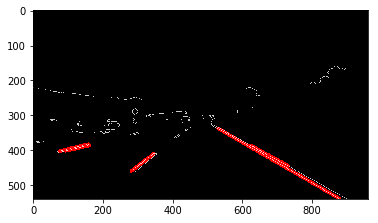

In [30]:
# convert the image to grayscale
image = mpimg.imread('test.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Define a kernel size and apply Gaussian smoothing
kernel_size =5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

# Define our parameters for Canny and apply
low_threshold =120
high_threshold = 240
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Next we'll create a masked edges image using cv2.fillPoly()
mask = np.zeros_like(edges)  

ignore_mask_color = 255 

## This time we are defining a four sided polygon to mask
#imshape = image.shape
#print(imshape)
#vertices = np.array([[(0,imshape[0]),(0, 0), (imshape[1], 0), (imshape[1],imshape[0])]], dtype=np.int32)
#cv2.fillPoly(mask, vertices, ignore_mask_color)
#masked_edges = cv2.bitwise_and(edges, mask)

# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 9
theta = np.pi/180
threshold = 15
min_line_length = 60
max_line_gap = 5
line_image = np.copy(image)*0 #creating a blank to draw lines on

# Run Hough on edge detected image
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

# Iterate over the output "lines" and draw lines on the blank
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges)) 

# Draw the lines on the edge image
combo = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
plt.imshow(combo)

## Test TensorFlow

In [31]:
import tensorflow as tf

In [32]:
with tf.Session() as sess:
    a = tf.constant(1)
    b = tf.constant(2)
    c = a + b
    # Should be 3
    print("1 + 2 = {}".format(sess.run(c)))


1 + 2 = 3


## Test Moviepy

In [33]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import *
from IPython.display import HTML
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2


Create a new video with `moviepy` by processing each frame to [YUV](https://en.wikipedia.org/wiki/YUV) color space.

In [37]:
vikas=[]
image = VideoFileClip('test.mp4') 

count =0
for frames in image.iter_frames():
    gray = cv2.cvtColor(frames, cv2.COLOR_RGB2YUV)
    # Define a kernel size and apply Gaussian smoothing
    kernel_size =5
    blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)
    low_threshold =100
    high_threshold = 200
    edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
    
    rho = 9
    theta = np.pi/180
    threshold = 15
    min_line_length =50
    max_line_gap = 3
    line_image = np.copy(frames)*0 #creating a blank to draw lines on
    
    # Run Hough on edge detected image
    lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                                min_line_length, max_line_gap)
    
    # Iterate over the output "lines" and draw lines on the blank
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)
    
    # Create a "color" binary image to combine with line image
    color_edges = np.dstack((edges, edges, edges)) 
    vikas.append(cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) )
    
    count+=1
    
  
myclip = [ImageClip(m).set_duration(.1)
      for m in vikas]
concat_clip = concatenate_videoclips(myclip, method="compose")
new_clip_output=concat_clip.write_videofile("test1.mp4", fps=30)

[MoviePy] >>>> Building video test1.mp4
[MoviePy] Writing video test1.mp4


100%|██████████| 754/754 [00:10<00:00, 72.60it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test1.mp4 



In [36]:
HTML("""
<video width="640" height="300" controls>
  <source src="{0}" type="video/mp4">
</video>
""".format(new_clip_output))